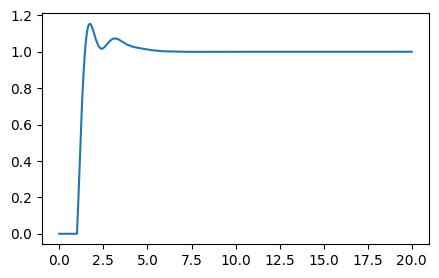

In [94]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
a = np.array([0, 1, 6, 10])
b = np.array([1, 0, 7, 1])
A, B, C, D = scipy.signal.tf2ss(a, b)

KP = 5.0;KI = 5.0;KD = 1.0  # PID gains
umax = 2.0;umin = -2.0;     # upper and lower saturation values
step_initial = 0.0;step_final = 1.0;step_time = 1.0  # parameters of the step function
dt = 0.01  #----- step-size
tf = 20    #----- finla time
x = np.array([[0.0], [0.0],[ 0.0]])  #---- initial values for the state variables


y = np.dot(C, x)
t = np.arange(0.0, tf, dt)
Y = np.arange(0.0, tf, dt)
counter = 0
I = 0.0  # integral of the error
error = 0.0
for tt in t:
    counter += 1
    SP = step_initial+0.0 if tt <= step_time else step_final+0.0
    error_old = error+0.0
    error = SP - y[0,0]
    de = (error - error_old) / dt
    u = KP * error + KI * I + KD * de
    if u>umax:      u=umax+0.0
    if u<umin:      u=umin+0.0
    I += error * dt
    x = x + (np.dot(A, x) + B * u) * dt  #---- Solving the ODE using Euler's method
    y = np.dot(C, x) + D * u
    Y[counter - 1] = y[0,0]
plt.figure(figsize = (5, 3))
plt.plot(t, Y)
plt.show()